<h1><center>Derivation of the Spherical Harmonics(SH) moment equations</center></h1>

This notebook gives the derivation of the SH moment equations (in 3D) from the isotropic radiative transfer equation. The same derivation can be found in the paper [StaRMAP - A second order staggered grid method for spherical harmonics moment equations of radiative transfer](https://arxiv.org/abs/1211.2205). We repeat the derivation here in more detail.

Complex valued spherical harmonics:

$$
\begin{align}
  Y^{lm}(\theta, \phi) &=
  \begin{cases}
    (-1)^m\sqrt{\frac{2l+1}{4\pi}\frac{(l-m)!}{(l+m)!}}e^{im\phi}P^{l}\left(\operatorname{cos}\left(\theta\right)\right), & \text{$m\ge0$}.\\
    \left(-1\right)^m\overline{Y^{l\left|m\right|}}(\theta, \phi), & \text{$m<0$}.
  \end{cases}
\end{align}
$$

with $\overline Y$ referring to the complex conjugate of $Y$. $(-1)^m$ is the Condon-Shortley phase (which is not included in our definition of the Legendre-Polynomials $P_l$).

We can express angular quantities, like the radiance field $L$ as an infinite sum of weighted spherical harmonic basis functions:

$$
L(\vec{x}, \omega) = \sum_{l=0}^\infty{\sum_{m=-l}^l{L^{lm}\left(\vec{x}\right)Y^{lm}\left(\omega\right)}}
$$

The angular independent spherical harmonics coefficients $L^{lm}$ are found by multiplying with $\overline{Y^{lm}}$ and integrating over solid angle $\omega$:

$$ 
L^{lm}\left(\vec{x}\right) = \int_\Omega{\overline{Y^{lm}}\left(\omega\right)L\left(\vec{x}, \omega\right)\mathbf{d}\omega} 
$$

Note, that we use the complex conjugate $\overline{Y^{lm}}$ for projection, but $Y^{lm}$ for reconstruction. This is due to the properties of spherical harmonics (see [here](https://en.wikipedia.org/wiki/Spherical_harmonics#Spherical_harmonics_expansion)).

We now project the time-dependent (isotropic) radiative transfer equation(RTE) into spherical harmonics. The time dependent RTE is given as:

$$
\begin{align}
\frac{\partial L }{\partial t} + (\omega\cdot\nabla)L(\vec{x}, \omega)=-\sigma_t(\vec{x})L(\vec{x}, \omega) + \sigma_s(\vec{x})\int_{\Omega'}f_p(\vec{x}, \omega'\cdot\omega)L(\vec{x}, \omega')\mathbf{d}\omega' + Q(\vec{x})
\end{align}
$$

In general the expansion of the RTE is done in two steps:

1. All radiative quantities, such as the radiance field $L$, the phase function $f_p$ and the scattering coefficients $\sigma_\star$ are replaced with their spherical harmonics expansions. Therefore we have $\sum_l{\sum_m{a^{lm}Y^{lm}}}$ terms appear in the expanded RTE terms. This means that we have expressed the RTE terms in terms of spherical harmonics coefficients, but they still depend on direction $\omega$.
2. As a second step, we multiply the terms by $\overline Y^{lm}$ and integrate over solid angle. The following property of the spherical harmonics will give us the final form of the expanded RTE:
$$
\int_\Omega{Y^{lm}\overline{Y^{l'm'}}} = \delta_{ll'}\delta_{mm'}
$$

This property will eleminate all $Y^{lm}\overline{Y^{lm}}$ pairs and sums will be seperated into different moment equations.

We now will project each individual term into spherical harmonics.

--------------------------------

### Scattering Term

We start with the scattering term:

$$
\sigma_s(\vec{x})\int_{\Omega'}f_p(\vec{x}, \omega'\cdot\omega)L(\vec{x}, \omega')\mathbf{d}\omega'
$$

during our deriviation, we will set $\sigma_s(x) = 1$. The remaining integral is the scattering operator $S$ acting upon $L$, using the phase function $f_p$:

$$
S[L](\omega) = \int_{\Omega'}f_p(\vec{x}, \omega'\cdot\omega)L(\vec{x}, \omega')\mathbf{d}\omega'
$$

The phase function used in isotropic scattering medium only depends on the angle between incident and outgoing direction and therefore is rotationally symmetric around the pole defining axis. This property allows us to define a rotation $R(\omega)$, which rotates the phase function such that the pole axis aligns with direction vector $\omega$. The rotated phase function is defined as:

$$
\rho_{R(\omega)}(f_p)
$$

where $\rho$ is the rotation operator which can be implemented by applying the inverse rotation $R(\omega)^{-1}$ to the arguments of $f_p$. With this rotated phase function, we now can express the scattering operator as a convolution: 

$$
\begin{align}
S[L](\omega) &= \sigma_s(\vec{x})(L\circ \rho_{R(\omega)}(f_p))(\omega) \\
(f\circ \rho_{R(\omega)}(f_p)) &= \int_{\Omega'}{L(\vec{x}, \omega')\rho_{R(\omega)}(f_p)(\omega')\mathbf{d}\omega'} \\
&= \langle L,  \rho_{R(\omega)}(f_p)\rangle
\end{align}
$$

As we evaluate the inner product integral of the convolution, the phase function rotates along with the argument $\omega$. Now we express the convolution as a product of the spherical harmonics coefficients of $L$ and $f_p$. The derivation involves some few steps. First we replace $L$ and $f_p$ with its spherical harmonics expansions:

$$
\begin{align}
L(\vec{x}, \omega) &= \sum_l\sum_{m=-l}^{l}{L^{lm}(\vec{x})Y^{lm}(\omega)} \\
f_p(\vec{x}, \operatorname{cos}\theta ) &= \sum_l\sum_{m=-l}^{l}{f_p^{lm}(\vec{x}) Y^{lm}(\omega)}
\end{align}
$$

The expansion of the phase function can be further simplified, because the phase function is rotationally symmetric around the pole axis. Consider the definition of the spherical harmonics basis function $Y^{lm}$:

$$
Y^{lm}(\theta, \phi) = C^{lm}e^{im\phi}P^{lm}(\operatorname{cos}(\theta))
$$

Now we apply a rotation $R(\alpha)$ of $\alpha$ degrees around the pole axis. In spherical harmonics, this is expressed as:

$$
\rho_{R(\alpha)}(Y^{lm}) = e^{-i m\alpha}Y^{lm}
$$

If the phase function is rotationally symmetric around the pole axis, we have:

$$
\rho_{R(\alpha)}(f_p) = f_p
$$

and in spherical harmonics this would be:

$$
\sum_l\sum_{m=-l}^{l}{ e^{-i m\alpha}f_p^{lm} Y^{lm} } = \sum_l\sum_{m=-l}^{l}{ f_p^{lm} Y^{lm} }
$$

By equating coefficients we get:

$$
f_p^{lm} = f_p^{lm}e^{-i m\alpha}
$$

Since $e^{-i m\alpha}=1$ for all $\alpha$ only when $m=0$, we can conclude that $f_p^{lm} = 0$ for all $m\ne0$. This means that for a function which is rotationally symmetric around the pole axis, only the $m=0$ coefficients will be valid.

$$
f_p(\omega) = \sum_l{f_p^{l0} Y^{l0}}
$$

We now use the spherical harmonics expansions of $L$ and $f_p$ in the definition for the inner product of our convolution:

$$
\begin{align}
S[L](\omega) = \left < \sum_l\sum_{m=-l}^{l}{L^{lm}(\vec{x}) Y^{lm}(\omega)}, \rho_{R(\omega)}\left ( \sum_l{f_p(\vec{x})^{l0} Y^{l0}(\omega)} \right )\right >
\end{align}
$$

Due to linearity of the inner product operator, we can pull out the non-angular dependent parts of the expansions:

$$
\begin{align}
S[L](\omega)  &= \sum_l\sum_{m=-l}^{l}{ L^{lm}(\vec{x}) \left <  Y^{lm}(\omega), \rho_{R(\omega)}\left ( \sum_l{f_p(\vec{x})^{l0} Y^{l0}(\omega)} \right )\right >}
\end{align}
$$

and further:

$$
\begin{align}
S[L](\omega)  &= \sum_{l'}{\sum_l\sum_{m=-l}^{l}{ f_p(\vec{x})^{l'0}L^{lm}(\vec{x}) \left < Y^{lm}(\omega), \rho_{R(\omega)}\left ( Y^{l'0}(\omega) \right )\right >}}
\end{align}
$$

The rotation $\rho_{R(\omega)}$ of a function with frequency $l$ gives a function of frequency $l$ again. In addition the spherical harmonics basis functions $Y^{lm}$ are orthogonal. We therefore have:

$$
\left < Y^{lm}, \rho_{R(\omega)}\left(Y^{l'm'}\right) \right > = 0       \qquad    \text{for all}\ \ l\ne l' 
$$

which further simplifies our scattering operator to:

$$
\begin{align}
S[L](\omega)  &= \sum_l\sum_{m=-l}^{l}{ f_p(\vec{x})^{l0}L^{lm}(\vec{x}) \left < Y^{lm}(\omega), \rho_{R(\omega)}\left ( Y^{l0}(\omega) \right )\right >}
\end{align}
$$

What remains to be resolved is the inner product. We use the fact, that the spherical harmonics basis functions $ Y^{lm}$ are eigenfunctions of the inner product integral operator in the equation above:

$$
\begin{align}
\left < Y^{lm}, \rho_{R(\omega)}\left ( Y^{l0} \right )\right > = \lambda_l Y^{lm}
\end{align}
$$

replacing the inner product gives:

$$
\begin{align}
S[L](\omega)  &= \sum_l\sum_{m=-l}^{l}{ f_p(\vec{x})^{l0}L^{lm}(\vec{x}) \lambda_l Y^{lm}(\omega)}
\end{align}
$$

Now we have expressed the scattering operator using the spherical harmonics expansion for phase function $f_p$ and radiance field $L$. However, we haven't done a spherical harmonics expansion of the operator itsself. It is still a scalar function which depends on direction $\omega$ and all coefficients of phase function and radiance field.

We project the scattering operator into spherical harmonics by multiplying with $\overline {Y^{l'm'}}$ and integrating over solid angle $\omega$. We can pull all factors out of the integral, which do not depend on $\omega$. This gives:

$$
\begin{align}
\int_{\Omega}{ \overline{Y^{l'm'}}(\omega) S[L](\omega)\mathbf{d}\omega}  &= \sum_l\sum_{m=-l}^{l}{ f_p(\vec{x})^{l0}L^{lm}(\vec{x}) \lambda_l\int_{\Omega}{ \overline{Y^{l'm'}}(\omega) Y^{lm}(\omega)\mathbf{d}\omega}}\\
&=\sum_l\sum_{m=-l}^{l}f_p(\vec{x})^{l0}L^{lm}(\vec{x}) \lambda_l \delta_{ll'}\delta_{mm'}\\
&=f_p(\vec{x})^{l0}L^{lm}(\vec{x}) \lambda_l
\end{align}
$$

Note that in contrast to the derivation from [Seibold](https://arxiv.org/abs/1211.2205) (compare p. 4), we have an additional $\lambda_l$ factor in our derivation.



--------------------

### Directional Derivative Term

Next we derive the expansion of the directional derivative term:
$$
(\omega\cdot\nabla)L(\vec{x}, \omega)
$$

Replacing $L$ with its expansion gives:
$$
(\omega\cdot\nabla)\sum_{l}{\sum_{m=-l}^l{L^{lm}\left(\vec{x}\right )Y^{lm}\left(\omega\right)}} 
$$

Next we multiply with $\overline{Y^{l'm'}}$ and integrate over solid angle:
$$
\int_\Omega\overline{Y^{l'm'}}(\omega\cdot\nabla)\sum_{l}{\sum_{m=-l}^l{L^{lm}\left(\vec{x}\right )Y^{lm}\left(\omega\right)}}\mathbf{d}\omega
$$

We can pull the spatial derivative out of the integral to get:
$$
\nabla\cdot\int_\Omega\omega\overline{Y^{l'm'}}\sum_{l}{\sum_{m=-l}^l{L^{lm}\left(\vec{x}\right )Y^{lm}\left(\omega\right)}} \mathbf{d}\omega
$$

We apply the following recurrence relation for the spherical harmonics basis functions:
$$
\omega\overline{Y^{lm}} = \frac{1}{2}
\left[
\begin{array}
\center
\ -c^{l-1, m-1}\overline{Y^{l-1,m-1}} + d^{l+1, m-1}\overline{Y^{l+1,m-1}} + e^{l-1, m+1}\overline{Y^{l-1,m+1}} - f^{l+1, m+1}\overline{Y^{l+1,m+1}}\\
i\left(c^{l-1, m-1}\overline{Y^{l-1,m-1}} - d^{l+1, m-1}\overline{Y^{l+1,m-1}} + e^{l-1, m+1}\overline{Y^{l-1,m+1}} - f^{l+1, m+1}\overline{Y^{l+1,m+1}}\right) \\
2\left(a^{l-1, m}\overline{Y^{l-1,m}}+b^{l+1, m}\overline{Y^{l+1,m}}\right)
\end{array}
\right]
$$

The coefficients $a$, $b$, $c$, $d$, $e$ and $f$ are defined as in [here](https://arxiv.org/abs/1211.2205).

Inserting this recurrence formulation gives:
$$
\left(
\begin{array}
\center
\frac{1}{2}\partial_x\\
\frac{i}{2}\partial_y\\
\partial_z
\end{array}
\right)
\cdot\int_\Omega
\left[
\begin{array}
\center
\ -c^{l'-1, m'-1}\overline{Y^{l'-1,m'-1}} + d^{l'+1, m'-1}\overline{Y^{l'+1,m'-1}} + e^{l'-1, m'+1}\overline{Y^{l'-1,m'+1}} - f^{l'+1, m'+1}\overline{Y^{l'+1,m'+1}}\\
c^{l'-1, m'-1}\overline{Y^{l'-1,m'-1}} - d^{l'+1, m'-1}\overline{Y^{l'+1,m'-1}} + e^{l'-1, m'+1}\overline{Y^{l'-1,m'+1}} - f^{l'+1, m'+1}\overline{Y^{l'+1,m'+1}} \\
a^{l'-1, m'}\overline{Y^{l'-1,m'}}+b^{l'+1, m'}\overline{Y^{l'+1,m'}}
\end{array}
\right]
\sum_{l}{\sum_{m=-l}^l{L^{lm}\left(\vec{x}\right )Y^{lm}\left(\omega\right)}} \mathbf{d}\omega
$$




Integrating the vector term over solid angle can be expressed as seperate solid angle integrals over each component. These integrals over a sum of terms are split into seperate integrals. We arrive at:

$$
\left(
\begin{array}
\center
\frac{1}{2}\partial_x\\
\frac{i}{2}\partial_y\\
\partial_z
\end{array}
\right)
\cdot
\left[
\begin{array}
\center
\ -c^{l'-1, m'-1}\sum_{l}{\sum_{m=-l}^l{L^{lm}\left(\vec{x}\right )\int_\Omega{\overline{Y^{l'-1,m'-1}}\left(\omega\right)Y^{lm}\left(\omega\right)\mathbf{d}\omega}}} \quad + \quad ...\\
c^{l'-1, m'-1}\sum_{l}{\sum_{m=-l}^l{L^{lm}\left(\vec{x}\right )\int_\Omega{\overline{Y^{l'-1,m'-1}}\left(\omega\right)Y^{lm}\left(\omega\right)\mathbf{d}\omega}}} \quad - \quad ... \\
a^{l'-1, m'}\sum_{l}{\sum_{m=-l}^l{L^{lm}\left(\vec{x}\right )\int_\Omega{\overline{Y^{l'-1,m'}}\left(\omega\right)Y^{lm}\left(\omega\right)\mathbf{d}\omega}}} \quad + \quad ...
\end{array}
\right]
$$


The property of the inner product between different spherical harmonics basis functions will select specific $lm$ in each term:
$$
\left(
\begin{array}
\center
\frac{1}{2}\partial_x\\
\frac{i}{2}\partial_y\\
\partial_z
\end{array}
\right)
\cdot
\left[
\begin{array}
\center
\ -c^{l-1, m-1}L^{l-1,m-1} + d^{l+1, m-1}L^{l+1,m-1} + e^{l-1, m+1}L^{l-1,m+1} + f^{l+1, m+1}L^{l+1,m+1}\\
c^{l-1, m-1}L^{l-1,m-1} + d^{l+1, m-1}L^{l+1,m-1} + e^{l-1, m+1}L^{l-1,m+1} + f^{l+1, m+1}L^{l+1,m+1} \\
a^{l-1, m}L^{l-1,m}+b^{l+1, m}L^{l+1,m}
\end{array}
\right]
$$

Which gives the final moment equation for the derivative term:
$$
\begin{align}
&\frac{1}{2}\partial_x\left(-c^{l-1, m-1}L^{l-1,m-1} + d^{l+1, m-1}L^{l+1,m-1} + e^{l-1, m+1}L^{l-1,m+1} - f^{l+1, m+1}L^{l+1,m+1}\right) + \\
&\frac{i}{2}\partial_y\left( c^{l-1, m-1}L^{l-1,m-1} - d^{l+1, m-1}L^{l+1,m-1} + e^{l-1, m+1}L^{l-1,m+1} - f^{l+1, m+1}L^{l+1,m+1} \right) + \\
&\partial_z\left( a^{l-1, m}L^{l-1,m}+b^{l+1, m}L^{l+1,m} \right)
\end{align}
$$





--------------------------------

### Extinction Term, Source Term and Time Derivative Term

Here we develop the extinction term of the RTE into spherical harmonics:

The isotropic extinction term is given as:
$$
-\sigma_t\left(\vec{x}\right)L\left(\vec{x}, \omega\right)
$$

Further we have that the SH coefficients of the extinction coefficients are the sum of the coefficients for absorption and scattering:

$$
\begin{align}
\sigma_a + \sigma_s &= \sum_l\sum_{m=-l}^l \sigma_{a}^{lm}+\sum_l\sum_{m=-l}^l\sigma_{s}^{lm}\\
&= \sum_l\sum_{m=-l}^l \sigma_{a}^{lm}+\sigma_{s}^{lm}\\
&= \sum_l\sum_{m=-l}^l\sigma_{t}^{lm}\\
&= \sigma_t
\end{align}
$$

We first replace the radiance field $L$ with its spherical harmonics expansion:
$$
-\sigma_t\left(\vec{x}\right)\sum_{l}{\sum_{m=-l}^l{L^{lm}\left(\vec{x}\right )Y^{lm}\left(\omega\right)}}    
$$

Multiplying with $\overline{Y^{l'm'}}$ and integrating over solid angle gives:
$$
\begin{align}
&-\sigma_t\left(\vec{x}\right)\sum_{l}{\sum_{m=-l}^l{L^{lm}\left(\vec{x}\right )\int_\Omega\overline{Y^{l'm'}}\left(\omega\right)Y^{lm}\left(\omega\right)\mathbf{d}\omega}}\\
&= -\sigma_t\left(\vec{x}\right)\sum_{l}{\sum_{m=-l}^l{L^{lm}\left(\vec{x}\right )\delta_{ll'}\delta_{mm'}}}\\
&= -\sigma_t\left(\vec{x}\right)L^{lm}\left(\vec{x}\right )
\end{align}
$$

In a similar simple way we derive the moment expansion of the source term $q(\vec{x}, \omega)$:

$$
q^{lm}
$$

And the time derivative term $\partial_t L(\vec{x},\omega)$:

$$
\partial_t L^{lm}
$$




--------------------------------

### Putting it together

The isotropic RTE is given as:
$$
\begin{align}
\frac{\partial L }{\partial t} + (\omega\cdot\nabla)L(\vec{x}, \omega)=-\sigma_t(\vec{x})L(\vec{x}, \omega) + \sigma_s(\vec{x})\int_{\Omega'}f_p(\vec{x}, \omega'\cdot\omega)L(\vec{x}, \omega')\mathbf{d}\omega' + Q(\vec{x})
\end{align}
$$

Using the derived moment expansions of all the individual terms, we get:
$$
\begin{align}
\partial_t L^{lm} + &\frac{1}{2}\partial_x\left(-c^{l-1, m-1}L^{l-1,m-1} + d^{l+1, m-1}L^{l+1,m-1} + e^{l-1, m+1}L^{l-1,m+1} - f^{l+1, m+1}L^{l+1,m+1}\right) + \\
&\frac{i}{2}\partial_y\left( c^{l-1, m-1}L^{l-1,m-1} - d^{l+1, m-1}L^{l+1,m-1} + e^{l-1, m+1}L^{l-1,m+1} - f^{l+1, m+1}L^{l+1,m+1} \right) + \\
&\partial_z\left( a^{l-1, m}L^{l-1,m}+b^{l+1, m}L^{l+1,m} \right) = \left(-\sigma_t\left(\vec{x}\right) +
\sigma_s\left(\vec{x}\right)f_p(\vec{x})^{l0}\lambda_l\right) L^{lm}(\vec{x}) +
q^{lm}
\end{align}
$$

In matrix notation, this is written as:

$$
\partial_t\vec{u} + M_x\cdot\partial_x\vec{u}+M_y\cdot\partial_y\vec{u}+M_z\cdot\partial_z\vec{u} + C\cdot\vec{u} = \vec{q}
$$

There is a difference to the derivation given in the paper from [Seibold](https://arxiv.org/abs/1211.2205):
Our scattering term has an additional factor $\lambda_l$

-------------------------

<h1><center>Time stepping in Starmap</center></h1>

After deriving the moment equations using spherical harmonics expansion, the Starmap paper arrives at a simple ODE by using the fact, that even solution components (those which are located on grids G00 and G11) only depend on odd solution components (those which are located on grids G01 and G10) when stepping in time. Also very important was the fact, that the matrix $C$ (which expresses extinction and scattering terms from the original RTE) is diagonal. This allows to arrive a the following simple scalar ODE:

$$
\partial_t u(t) + au(t)  = r
$$

The general solution for the ODE above is:

$$
u(t) = \frac{r}{a} + e^{-at}C
$$

where $C$ is a constant, which is found by specifying an initial value. Setting $u(0)=u_0$ gives the following solution for C:

$$
u_0 = \frac{r}{a} + C \quad \implies C = u_0-\frac{r}{a}
$$

Inserting this in the general solution for $u$ above gives:

$$
u(t) = \frac{r}{a} + e^{-at}\left(u_0-\frac{r}{a}\right)
$$

The solution vector for the whole domain is advanced in time using a timestep $\Delta t$. The expression above is used to update from $u(t)$ to $u(t+\Delta t)$. This is done by understanding each update step as an initial value Problem with $u_0 = u(t)$. Using this with the equation above gives:

$$
\begin{align}
u(t+\Delta t) &= \frac{r}{a} + e^{-a\Delta t}\left(u\left(t\right)-\frac{r}{a}\right)\\
&= \frac{r}{a} + e^{-a\Delta t}u\left(t\right) - e^{-a\Delta t}\frac{r}{a}\\
&= e^{-a\Delta t}u\left(t\right) + \frac{r}{a} - e^{-a\Delta t}\frac{r}{a}\\
&= e^{-a\Delta t}u\left(t\right) + \frac{r}{a}\left( 1 - e^{-a\Delta t}\right)
\end{align}
$$

This result corresponds to Eq. 18 in the Starmap paper. Note that we have a plus sign between the two terms in the RHS, while the Starmap paper has typo there.

The current update expression is not defined for $a=0$. The paper rearranges the update step, such that it is defined for $a=0$:

$$
\begin{align}
u(t+\Delta t)&=e^{-a\Delta t}u\left(t\right) + \frac{r}{a}\left( 1 - e^{-a\Delta t}\right)\\
&=u\left(t\right) - u\left(t\right) + e^{-a\Delta t}u\left(t\right) + \frac{r}{a} - e^{-a\Delta t}\frac{r}{a}\\
&=u\left(t\right)+\left(\frac{r}{a}-u\left(t\right)\right)\left(1-e^{-a\Delta t}\right)\\
&=u\left(t\right)+\left(r-au\left(t\right)\right)\frac{1-e^{-a\Delta t}}{a}\\
&=u\left(t\right)+\Delta t\left(r-au\left(t\right)\right)\frac{1-e^{-a\Delta t}}{a\Delta t}\\
&=u\left(t\right)+\Delta t\left(r-au\left(t\right)\right)\frac{e^{-a\Delta t}-1}{-a\Delta t}\\
&=u\left(t\right)+\Delta t\left(r-au\left(t\right)\right)E(-a\Delta t)
\end{align}
$$

with $E(c) = \frac{\operatorname{exp}(c)-1}{c}$.

The following code validates the time stepping equations:

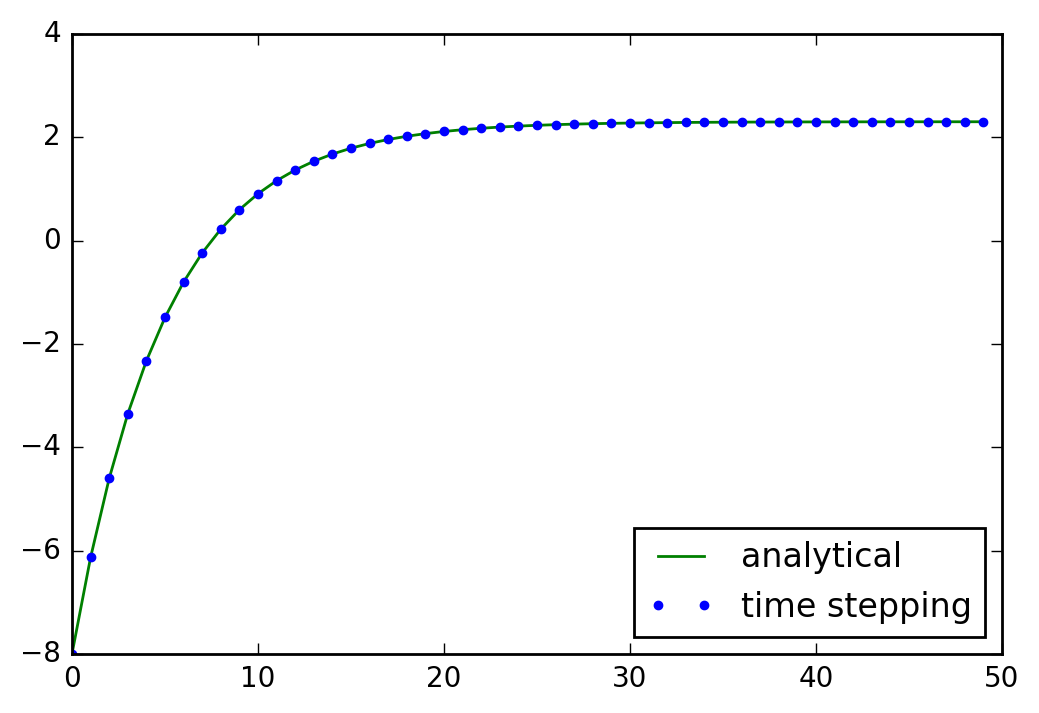

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
from IPython.html.widgets import *
import numpy as np
import matplotlib.pyplot as plt

# this function computes the solution to u by
# 1. evaluating the analytical solution for u(0) = u0
# 2. time stepping from u0 using the incremental update rule derived above
def solve_u( a, r, u0 ):
    dt = 0.2
    t_list = np.arange(0.0, 10.0, dt)
    numSteps = t_list.shape[0]

    u_list = np.zeros( numSteps )
    u2_list = np.zeros( numSteps )

    t = 0.0
    for i in range(numSteps):
        u2_list[i] = np.exp(-a*t)*(a*u0-r+r*np.exp(a*t))/a
        if i==0:
            u_list[0] = u0
        else:
            u_list[i] = np.exp(-a*dt)*u_list[i-1] + r/a*(1.0-np.exp(-a*dt))
        t += dt


    plt.plot( u2_list, color="g", label="analytical" )
    plt.plot( u_list, marker='.', linestyle=' ', color="b", label="time stepping" )
    plt.legend(loc='best')
    
a_widget = widgets.FloatSlider(min=-4.0, max=4.0, step=0.1, value=1.0)
r_widget = widgets.FloatSlider(min=-10.0, max=10.0, step=0.1, value=0.0)
u0_widget = widgets.FloatSlider(min=-10.0, max=10.0, step=1.0, value=1.0)

interact(solve_u, a = a_widget, r = r_widget, u0=u0_widget );

The timestep update is done first for the even components with specific values for $a$ and $r$, computed from the odd components. These are are assumed constant during timestep $\Delta t$. Then the odd components are updated with specific values $a$ and $r$ from even components, which are also assumed constant.